In [1]:
# Loading Pandas and Numpy
import pandas as pd
import numpy as np

# Loading NLTK NAtural language processing toolkit library
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# Loading Feature Extraction tools and Libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from sklearn.metrics.pairwise import cosine_similarity
from gensim.models import Word2Vec
from scipy.stats import spearmanr
from scipy.stats import kendalltau

# Loading Libraries for Visualization 
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

# Loading other required Libraries 
import string
import re
import os
import time
import itertools
import networkx as nx

Using TensorFlow backend.


In [2]:
name_token_data = pd.read_csv("name_token_data_final.csv")

In [3]:
person_doc=pd.read_csv('AllPeopleDocumentUpdated.csv')

## TF-IDF

In [4]:
tfidfvectoriser=TfidfVectorizer(ngram_range = (2, 2))
tfidfvectoriser.fit(name_token_data['Token Words'])
tfidf_vectors=tfidfvectoriser.transform(name_token_data['Token Words'])
tfidf_similarity=cosine_similarity(tfidf_vectors)


In [5]:
name_dict = name_token_data['Person Name'].to_dict()
rank_df = pd.DataFrame.from_dict(name_dict, orient='index',columns=["Name"])

In [ ]:
pr_list=['pr_99','pr_95','pr_90','pr_85','pr_80','pr_75','pr_70','pr_65','pr_60']
hits_list=['hits_99','hits_95','hits_90','hits_85','hits_80','hits_75','hits_70','hits_65','hits_60']
similarity_threshold=[0.99,0.95,0.90,0.85,0.80,0.75,0.70,0.65,0.60]

In [ ]:
for i in range(0,len(similarity_threshold)):
    edges = [[ix,iy] for ix, row in enumerate(tfidf_similarity) for iy, i in enumerate(row) if i > similarity_threshold[i] and ix!=iy]
    G=nx.Graph()
    G.add_nodes_from(list(range(0,len(name_dict))))
    G.add_edges_from(edges)
    H=nx.relabel_nodes(G,name_dict) 
    rank_df[pr_list[i]] = rank_df['Name'].map(pr)
    h, a = nx.hits(H, max_iter=100)
    h = dict(sorted(h.items(), key=lambda x: x[1],reverse=True))
    rank_df[hits_list[i]] = rank_df['Name'].map(h)

In [74]:
rank_df

,Name,pr_99,hits_99,pr_95,hits_95,pr_90,hits_90,pr_85,hits_85,pr_80,hits_80,pr_75,hits_75,pr_70,hits_70,pr_65,hits_65,pr_60,hits_60
0,hackett w iturleigh,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00
1,stella wash,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00
2,kalita much bad nhat,0.000031,2.020553e-279,0.000031,6.368030e-280,0.000031,3.765205e-298,0.000031,3.765205e-298,0.000031,3.765205e-298,0.000031,2.518934e-302,0.000030,2.473994e-302,0.000030,1.031346e-288,0.000030,1.030468e-288
3,ingo cleveland he,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00
4,william astor p kramm,0.000031,1.008818e-196,0.000031,3.179420e-197,0.000031,5.185753e-210,0.000031,5.185753e-210,0.000031,5.185753e-210,0.000031,4.249874e-213,0.000030,4.174052e-213,0.000030,7.727150e-204,0.000030,8.597913e-195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35691,jon mcquire,0.000031,1.008818e-44,0.000031,2.746090e-44,0.000031,4.382003e-45,0.000031,4.647642e-45,0.000031,4.647642e-45,0.000031,4.142347e-46,0.000030,4.068444e-46,0.000030,4.029506e-44,0.000030,4.492658e-44
35692,john walia,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000031,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00,0.000030,0.000000e+00
35693,chelle kipeelallr,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00
35694,loko erie,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00,0.000005,0.000000e+00


In [75]:
pd.DataFrame(rank_df).to_csv(r"bigram_rank.csv")

In [2]:
# bigram_rank=pd.read_csv('bigram_rank.csv')

In [5]:
spearman=[]
kendall=[]
for i in range(0,len(similarity_threshold)):
    coef, p = spearmanr(bigram_rank[pr_list[i]], bigram_rank[hits_list[i]])
    spearman.append(coef)
    coef, p = kendalltau(bigram_rank[pr_list[i]], bigram_rank[hits_list[i]])
    kendall.append(coef)

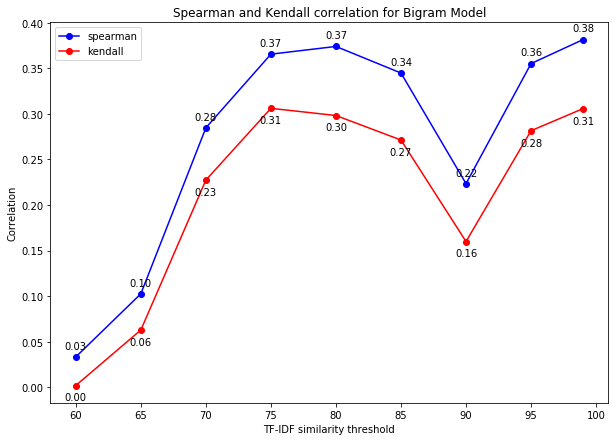

In [7]:
plt.figure(figsize=(10, 7))
plt.plot(similarity_threshold , spearman, marker='o', color='blue',label="spearman")
plt.plot( similarity_threshold, kendall, marker='o', color='red',label="kendall")
plt.title('Spearman and Kendall correlation for Bigram Model')
for x,y in zip(similarity_threshold,spearman):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,8), # distance from text to points (x,y)
                 ha='center')
for x,y in zip(similarity_threshold,kendall):

    label = "{:.2f}".format(y)

    plt.annotate(label, # this is the text
                 (x,y), # this is the point to label
                 textcoords="offset points", # how to position the text
                 xytext=(0,-15), # distance from text to points (x,y)
                 ha='center')
plt.legend()
plt.xlabel('TF-IDF similarity threshold')
plt.ylabel('Correlation')
plt.show()